In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [46]:
# create wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

In [47]:
# KNN regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [48]:
print(f"R^2: {reg.score(X_test, y_test)}")

R^2: 0.8344172446249604


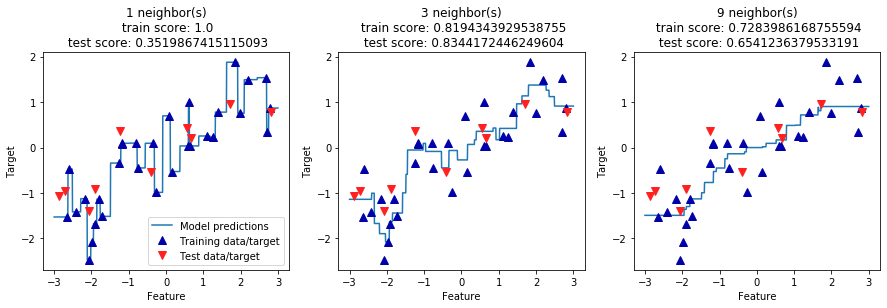

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train)}\n test score: {reg.score(X_test, y_test)}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

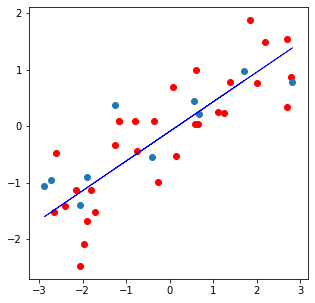

Train R^2: 0.6883322630458479
Test R^2: 0.626150295776388


In [96]:
# Linear Regression
fig, axes = plt.subplots(figsize=(5,5))

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(X_train, y_train, c='red')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='blue', linewidth=.8)
plt.show()
print(f"Train R^2: {lr_fit.score(X_train, y_train)}")
print(f"Test R^2: {lr_fit.score(X_test, y_test)}")